In [23]:
#imports and read and clean data

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gp
from collections import Counter
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


OUTPUT = Path.cwd().parents[0] / "Output"
df = pd.read_csv(Path.cwd().parents[0]  / "CSV" / "Raw"/ "all_tweets.csv")

def clean_emoji(x):
    if x == '{}':
        return None
    else:
        return x[1:-1]

df['emoji'] = df['emoji'].apply(clean_emoji)
df['hashtags'] = df['hashtags'].apply(lambda x:x[1:-1])
df['post_publish_date'] = pd.to_datetime(df['post_publish_date']) 
df['Date'] = df['post_publish_date'].dt.date
df['Month/Year'] = df['post_publish_date'].dt.to_period('M')
df.set_index('Month/Year',inplace =True)
df.drop(columns = ['post_guid'],inplace = True)

df

,long,lat,post_body,post_publish_date,post_language,hashtags,emoji,Date
Month/Year,,,,,,,,
2017-01,9.159337,45.461345,L’esercito silenzioso delle #donne #migranti h...,2017-01-18 11:56:38,it,"migranti,donne",None,2017-01-18
2017-01,12.545146,41.898417,".@lauraravetto: #Migranti, “Che dice Minniti s...",2017-01-18 12:09:43,it,Migranti,None,2017-01-18
2017-01,-8.621914,41.162142,#refugeecrisis https://t.co/JQoSFvMTbl,2017-01-18 12:06:31,und,refugeecrisis,None,2017-01-18
2017-01,12.545146,41.898417,".@lauraravetto : #Migranti, “Che dice Minniti ...",2017-01-18 12:07:41,it,Migranti,None,2017-01-18
2017-01,-2.115866,53.073712,""".@theresa_may: '""We can still have EU workers...",2017-01-18 12:17:35,en,"Brexit,PMQs,immigration",None,2017-01-18
...,...,...,...,...,...,...,...,...
2017-01,4.476774,50.501174,""". @JunckerEU '""We want to get rid of this id...",2017-01-18 11:05:00,en,"terrorism,Juncker,migration",None,2017-01-18
2017-01,14.380054,35.934249,Malts should not be allowed to deal with #migr...,2017-01-18 11:22:18,en,"EU2017MT,migration",None,2017-01-18
2017-01,-3.703508,40.477795,#RussianDissident Artist Will Seek #Asylum in ...,2017-01-18 11:17:53,en,"RussianDissident,Asylum",🇫🇷,2017-01-18


58
1746


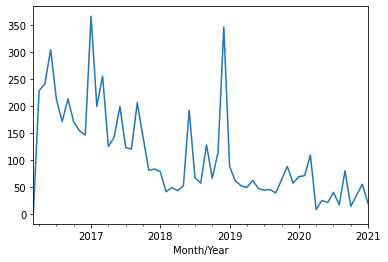

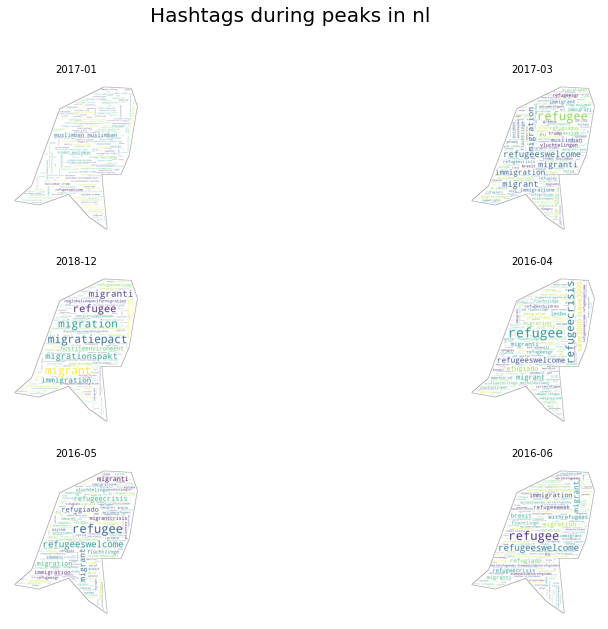

In [50]:
def generate_wordcloud(time,m):
    
    newlist =df['hashtags'].loc[time]
    foo = []
    for item in newlist:
        foo.append(item.lower().split(','))

    flat_list = [item for sublist in foo for item in sublist]
    #print(flat_list[:10])
    text = " ".join(word for word in flat_list)
    stopwords = set(STOPWORDS)
    
    wordcloud =WordCloud(stopwords=stopwords, 
               background_color="white", 
               width=800, 
               height=400,
               mask= m,
               contour_width=1,
               contour_color='black').generate(text)
    
    return wordcloud

def peaking(lan):
    
    mask = np.array(Image.open(OUTPUT/  "Mask for Wclouds" / f"{lan}.png"))
    userdf = df[df['post_language']== f'{lan}']
         
    userdf.groupby(userdf.index)['hashtags'].agg('count').plot()
    
    dates = userdf.groupby(userdf.index)['hashtags'].agg('count')
    dates = dates.sort_values(ascending =False)
    print(len(dates))
    
    
    peak_idx = userdf.index.intersection(dates.index[:6])
    peaks = userdf.loc[peak_idx]
    print(len(peaks))
    
    fig = plt.figure(figsize=(15,10))
    fig.suptitle(f'Hashtags during peaks in {lan}',fontsize =20)
    
    for idx,time in enumerate(peaks.index.unique()):
      
            ax = fig.add_subplot(3,2,idx+1)
            wordcloud = generate_wordcloud(time,mask)
            ax.set_title(time,fontsize =10)
            ax.imshow(wordcloud)
            ax.axis('off')
            
peaking('nl')           